In [50]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SKLEARN Libraries
# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, RobustScaler

# Model Selection
from sklearn.model_selection import (
    train_test_split,
    cross_validate,
    GridSearchCV,
    learning_curve,
    StratifiedKFold,
)
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay, accuracy_score, f1_score

# Models
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier

# IMBLEARN
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Pickle
import pickle

In [51]:
random_state = 42

In [52]:
#Loading Dataset
df = pd.read_csv('CA1-Classification-Dataset.csv')

#View Dataset
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Clarity,Quality
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [53]:
# df = df.dropna()

# print(len(df))
from sklearn.impute import KNNImputer

# Initialize KNNImputer with the desired number of neighbors
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the dataset
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Clarity,Quality
0,7.156857,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.05786,6.635246,336.094350,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.54173,9.275884,330.449166,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0
5,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0.0
6,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989,0.0
7,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0.0
8,7.592418,118.988579,14285.58385,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0.0
9,11.180284,227.231469,25484.50849,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0.0


<Axes: >

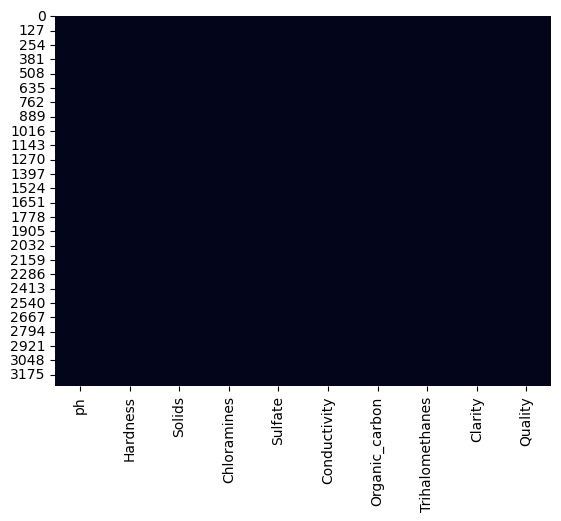

In [54]:
#From this we can see that the 3 columns with alot of missing data are sulfate, ph and trihalomethanes
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

In [55]:
X, y = df.drop("Quality", axis=1), df["Quality"]

In [56]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=random_state
)

# Copy the training data 
X_training = X_train.copy()

In [57]:
# Verify split
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (2620, 9)
X_test shape: (656, 9)


In [58]:
# Amount overdue 1 month ago
X_training['drinkable'] = (X_training['ph'] >= 6.5) & (X_training['ph'] <= 8.5)

# Verify new features
X_training.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Clarity,drinkable
2214,7.822492,208.636720,22308.82173,5.850328,408.123254,502.789396,16.135732,60.393982,3.835332,True
1634,6.037428,227.033994,12988.79123,8.476905,392.380529,306.386283,7.122391,41.190507,3.594217,False
2605,8.445219,228.522860,28966.56933,6.179855,322.987720,361.705354,14.554220,60.612230,4.400706,True
114,6.745307,218.424637,21871.83870,7.165509,318.046562,373.050102,16.826619,74.086080,3.902353,True
129,6.506488,202.285938,17087.07690,6.201983,326.662368,481.771934,16.535186,46.205748,3.548776,True


In [59]:
# Robust Scaler
scaler = RobustScaler()

# Declare numeric columns
num_cols = [
    "ph",
    "Hardness",
    "Solids",
    "Chloramines",
    "Sulfate",
    "Conductivity",
    "Organic_carbon",
    "Trihalomethanes",
    "Clarity"]

# Scale the numerical columns
scaler.fit(X_training[num_cols])

# Transform the training data
X_training[num_cols] = scaler.transform(X_training[num_cols])

# Verify transformation
X_training.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Clarity,drinkable
2214,0.436778,0.298687,0.123887,-0.637200,1.750940,0.667246,0.428015,-0.292382,-0.127215,True
1634,-0.576612,0.767999,-0.676558,0.682890,1.381948,-1.016151,-1.580284,-1.231626,-0.355661,False
2605,0.790303,0.805980,0.695684,-0.471583,-0.244540,-0.542004,0.075632,-0.281708,0.408452,True
114,-0.174746,0.548375,0.086357,0.023796,-0.360355,-0.444767,0.581955,0.377299,-0.063716,True
129,-0.310325,0.136679,-0.324580,-0.460462,-0.158410,0.487103,0.517019,-0.986330,-0.398715,True


In [60]:
X_training

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Clarity,drinkable
2214,0.436778,0.298687,0.123887,-0.637200,1.750940,0.667246,0.428015,-0.292382,-0.127215,True
1634,-0.576612,0.767999,-0.676558,0.682890,1.381948,-1.016151,-1.580284,-1.231626,-0.355661,False
2605,0.790303,0.805980,0.695684,-0.471583,-0.244540,-0.542004,0.075632,-0.281708,0.408452,True
114,-0.174746,0.548375,0.086357,0.023796,-0.360355,-0.444767,0.581955,0.377299,-0.063716,True
129,-0.310325,0.136679,-0.324580,-0.460462,-0.158410,0.487103,0.517019,-0.986330,-0.398715,True
...,...,...,...,...,...,...,...,...,...,...
101,0.167886,0.671851,-0.802787,0.890285,0.527630,0.593269,0.875792,0.359175,0.863392,True
1734,-1.773830,-0.134235,-0.303874,0.288615,-0.631472,-0.161615,-1.033005,-1.021790,1.033897,False
461,0.062948,0.174833,1.147393,1.152876,-0.308500,-0.080259,0.447024,1.164660,-0.582951,True
2242,-0.231318,-0.680051,0.220360,-0.025932,-0.243572,0.757891,1.348003,0.612792,0.190492,True


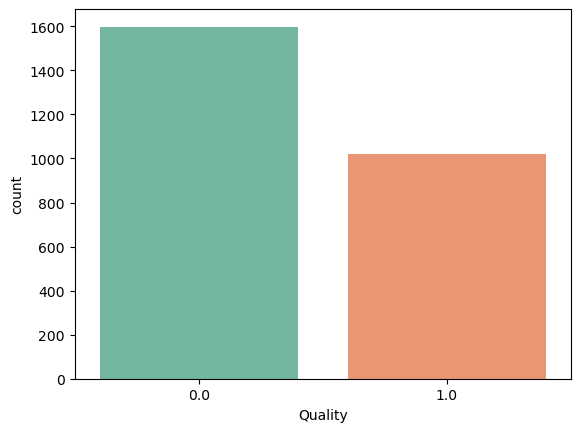

In [61]:
# Plot the distribution of the target label before resampling
sns.countplot(x=y_train, palette="Set2")
plt.show()

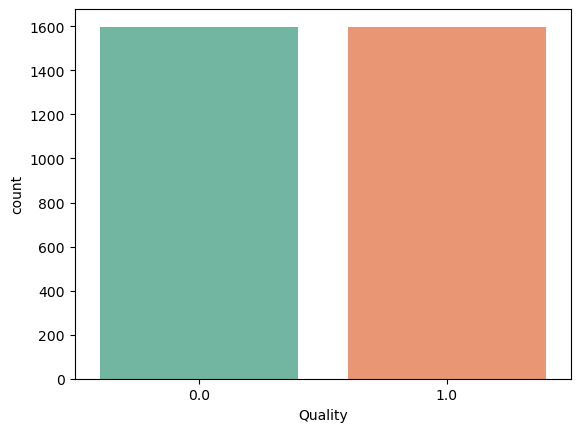

In [62]:
# SMOTE Oversampling
smote = SMOTE(random_state=random_state)

# Fit SMOTE to training data
X_resampled, y_resampled = smote.fit_resample(X_training, y_train)

# Plot the distribution of the target label after resampling
sns.countplot(x=y_resampled, palette="Set2")
plt.show()

In [63]:
scoring_metrics = ["accuracy","f1", "roc_auc"]

In [64]:
# Amount overdue 1 month ago
def Drinkable(df):
    df['drinkable'] = (df['ph'] >= 6.5) & (df['ph'] <= 8.5)
    return df


# Preprocessing steps
numeric_transformer = Pipeline([("scaler", RobustScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_transformer, num_cols),
    ]
)

# Oversampling
smt = SMOTE(random_state=random_state)

# Pipeline steps
steps = [
    ("overdue1", FunctionTransformer(Drinkable)),
    ("preprocessing", preprocessor),
    ("over", smt),
    ("model"),
]


STEP_LEN = len(steps) - 1

In [65]:
# Function to plot learning curves for a model

def plot_learning_curve(
    model,
    X,
    y,
    scoring,
    cv=StratifiedKFold(shuffle=True, random_state=42),
    train_sizes=np.linspace(0.1, 1.0, 10),
    ax=None,
):
    
    # Get model name
    try:
        model_name = type(model[-1]).__name__
    except:
        model_name = type(model).__name__
        
    # Create plot if ax is not passed
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))
        
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        model,
        X,
        y,
        cv=cv,
        n_jobs=-1,
        train_sizes=train_sizes,
        return_times=True,
        scoring=scoring,
    )
    
    # Calculate mean of scores
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    # Plot learning curve
    ax.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    ax.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    
    # Formatting
    ax.legend(loc="best")
    ax.set(
        ylim=(
            min(np.nanmin(train_scores), np.nanmin(test_scores)) - 0.01,
            max(np.nanmax(train_scores), np.nanmax(test_scores)) + 0.01,
        )
    )

    # Setting labels
    ax.set_title(f"Learning Curve of {model_name}")
    ax.set_ylabel(f"{scoring}")
    ax.set_xlabel("Train Sizes")
    return ax

In [66]:
# Initiate Classifiers with default parameters
models = [
    ("DecisionTreeClassifier", DecisionTreeClassifier()),
    ("RandomForestClassifier", RandomForestClassifier()),
    ("AdaBoostClassifier", AdaBoostClassifier()),
    ("LogisticRegression", LogisticRegression()),
    ("KNeighborsClassifier", KNeighborsClassifier()),
    ("GradientBoostingClassifier", GradientBoostingClassifier()),
    ("Perceptron", Perceptron()),
    ("ExtraTreesClassifier", ExtraTreesClassifier()),
    ("GaussianNB", GaussianNB()),
    ("RidgeClassifier", RidgeClassifier()),
    ("RidgeClassifierCV", RidgeClassifierCV()),
    ("SGDClassifier", SGDClassifier()),
]

In [67]:
# Function to access the performance of the models

def select_model(X_train, y_train, models, scoring):
    
    # Placeholder for the results
    out = []
    
    # Iterate through models
    for name, model in models:
        
        # Create a pipeline with the model and preprocessing steps
        steps[STEP_LEN] = (name, model)
        temp_pipeline = Pipeline(steps=steps)
        plot_learning_curve(
            temp_pipeline,
            X_train,
            y_train,
            scoring="f1",
            ax=ax[models.index((name, model)) % 4, models.index((name, model)) // 4],
        )
        
        # Cross validate the model
        score = cross_validate(
            temp_pipeline,
            X_train,
            y_train,
            scoring=scoring,
            n_jobs=3,
            cv=5,
            return_train_score=True,
        )
        
        # Calculate the average score across all the folds
        out.append(pd.Series(score, name=name).apply(np.mean))

    return pd.DataFrame(out)

c:\Users\user\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


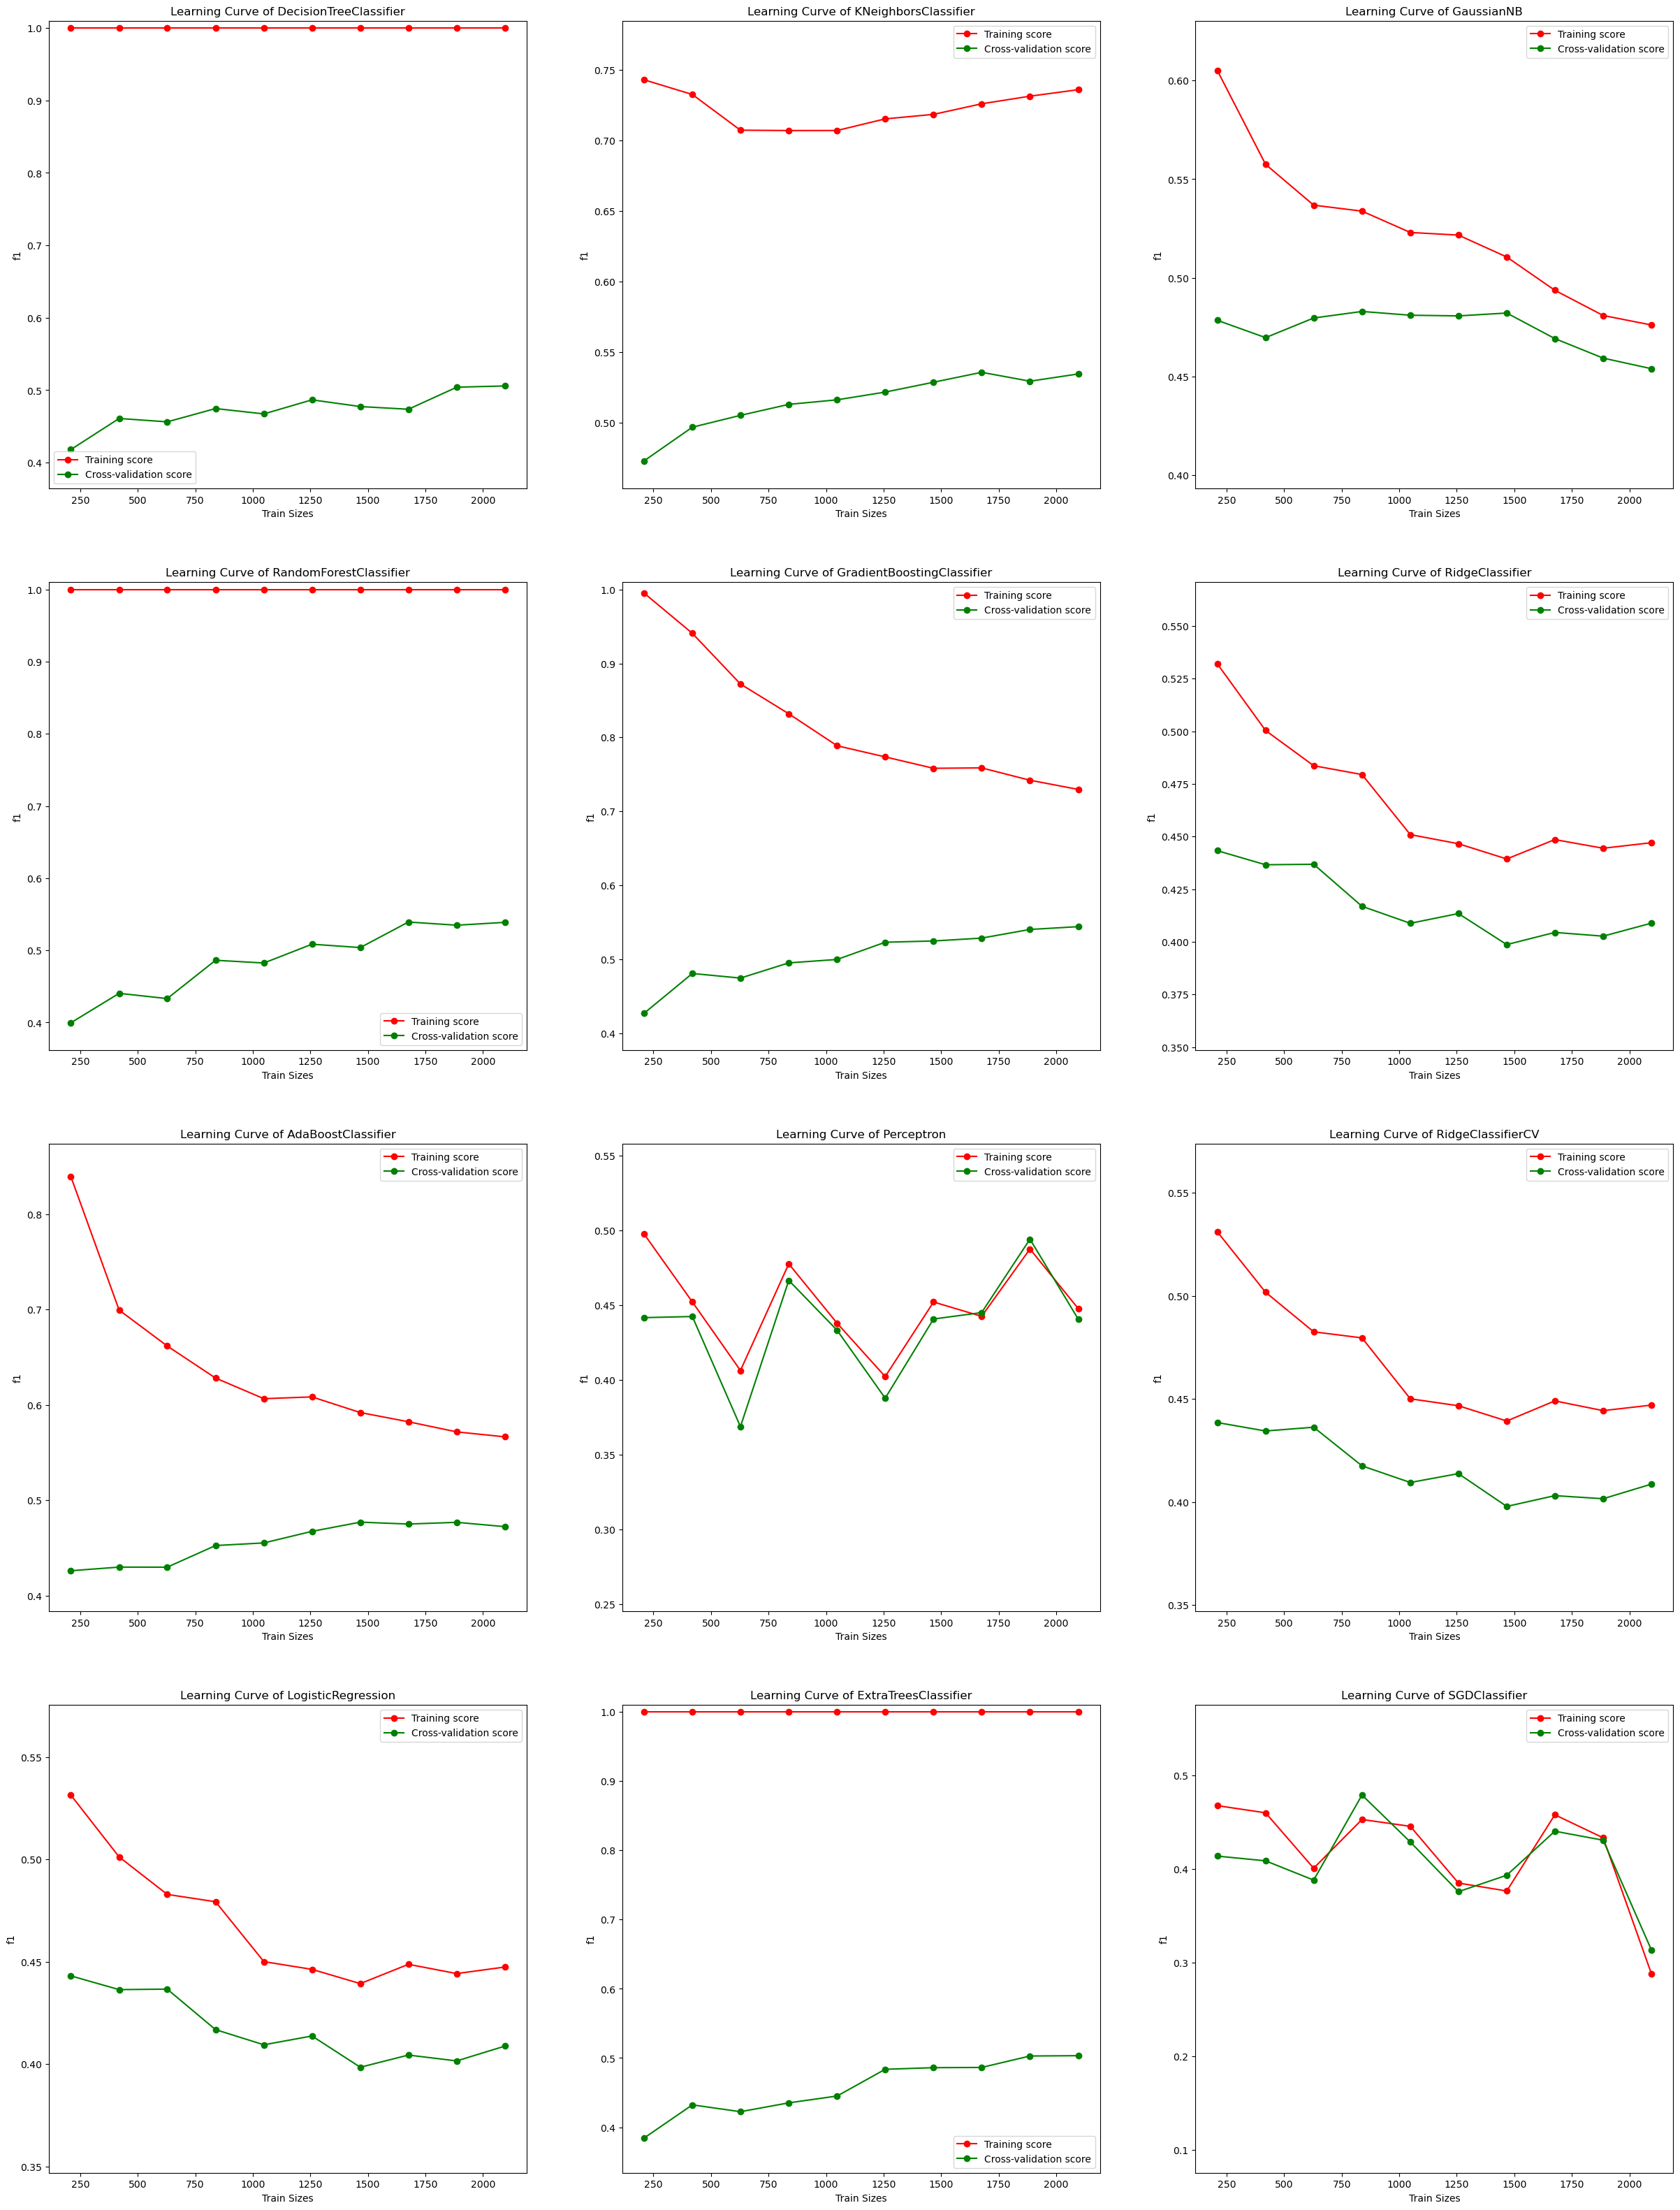

In [68]:
# Comparing the 12 learning curves
fig, ax = plt.subplots(4, 3, figsize=(30, 40))

model_scores = select_model(X_train, y_train, models, scoring_metrics)

In [69]:
# Accessing the scorings
model_scores.style.apply(
    lambda x: ["background-color: red; color: white" if v else "" for v in x == x.min()]
).apply(
    lambda x: [
        "background-color: green; color: white" if v else "" for v in x == x.max()
    ]
)

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_roc_auc,train_roc_auc
DecisionTreeClassifier,0.060028,0.013214,0.587786,1.000000,0.491105,1.000000,0.573720,1.000000
RandomForestClassifier,1.671492,0.058151,0.659924,1.000000,0.544058,1.000000,0.674027,1.000000
AdaBoostClassifier,0.399236,0.040993,0.538168,0.631107,0.456762,0.566541,0.550056,0.688426
LogisticRegression,0.029307,0.013214,0.495802,0.519752,0.424921,0.450909,0.492646,0.523289
KNeighborsClassifier,0.032408,0.087498,0.604198,0.774237,0.526695,0.737280,0.640379,0.867083
GradientBoostingClassifier,1.745734,0.013630,0.597328,0.767939,0.511673,0.717432,0.632322,0.860174
Perceptron,0.023443,0.010777,0.498092,0.482920,0.475066,0.470057,0.503503,0.502460
ExtraTreesClassifier,0.511077,0.059002,0.661450,1.000000,0.506867,1.000000,0.686839,1.000000
GaussianNB,0.028258,0.010103,0.574046,0.586069,0.466204,0.479091,0.585618,0.605297
RidgeClassifier,0.044900,0.014246,0.495420,0.519752,0.424207,0.450910,0.492689,0.523293


From above we can see that theres no extremly good model where most of the model suffer from overfitting and underfitting.

Because of that i will be choosing a model that fits the best parameters, being F1 score and shows lesser signs of both overfitting and underfitting. 

<h4>Tuning the hyper parameters Random Forest Classifier</h4>

We can make improvements to the model by tuning the hyperparameters. We will be using GridSearchCV to find the best hyperparameters for our model.

In [70]:
# List of hyper parameters for Gradient Boosting Classifier
list(RandomForestClassifier().get_params().keys())

['bootstrap',
 'ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'max_samples',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_jobs',
 'oob_score',
 'random_state',
 'verbose',
 'warm_start']

It is very hard to adjust all the hyper parameters for this model so we will be focusing on these important ones.

Random Forest Hyperparameters we’ll be Looking at:
<li>max_depth</li>
<li>min_sample_split</li>
<li>max_leaf_nodes</li>
<li>min_samples_leaf</li>
<li>n_estimators</li>
<li>max_sample (bootstrap sample)</li>
<li>max_features</li>

In [71]:
# Create param grid
param_grid = {
    'learning_rate': [0.1, 0.05, 0.01, 0.005],
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7],
}

# Create model based on pipeline
steps[STEP_LEN] = (
    "hyper",
    GridSearchCV(
        GradientBoostingClassifier(),
        param_grid,
        cv=5,
        verbose=1,
        n_jobs=-1,
        scoring="f1",
    ),
)

# Fitting Grid Search to Pipeline
rf_search = Pipeline(steps=steps)
rf_search.fit(X_train, y_train)

# Best model
print(rf_search["hyper"].best_estimator_)
print(rf_search["hyper"].best_params_)
print(rf_search["hyper"].best_score_)

# Fitting the best model to the pipeline
steps[STEP_LEN] = ("model", rf_search["hyper"].best_estimator_)
rf_clf = Pipeline(steps=steps)
rf_clf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
GradientBoostingClassifier(learning_rate=0.05, max_depth=7, n_estimators=400)
{'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 400}
0.7127789907756918


Pipeline(steps=[('overdue1',
                 FunctionTransformer(func=<function Drinkable at 0x00000187F39C9940>)),
                ('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['ph', 'Hardness', 'Solids',
                                                   'Chloramines', 'Sulfate',
                                                   'Conductivity',
                                                   'Organic_carbon',
                                                   'Trihalomethanes',
                                                   'Clarity'])])),
                ('over', SMOTE(random_state=42)),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=7,
                                            n_estimators=400))])

In [72]:
# Predicting the Test set results
rf_y_pred = rf_clf.predict(X_test)

In [73]:
steps[STEP_LEN] = ("model", DummyClassifier(strategy="uniform"))

# Create the pipeline
dummy = Pipeline(steps=steps)
dummy.fit(X_train, y_train)

# Predicting the Test set results
dummy_y_pred = dummy.predict(X_test)

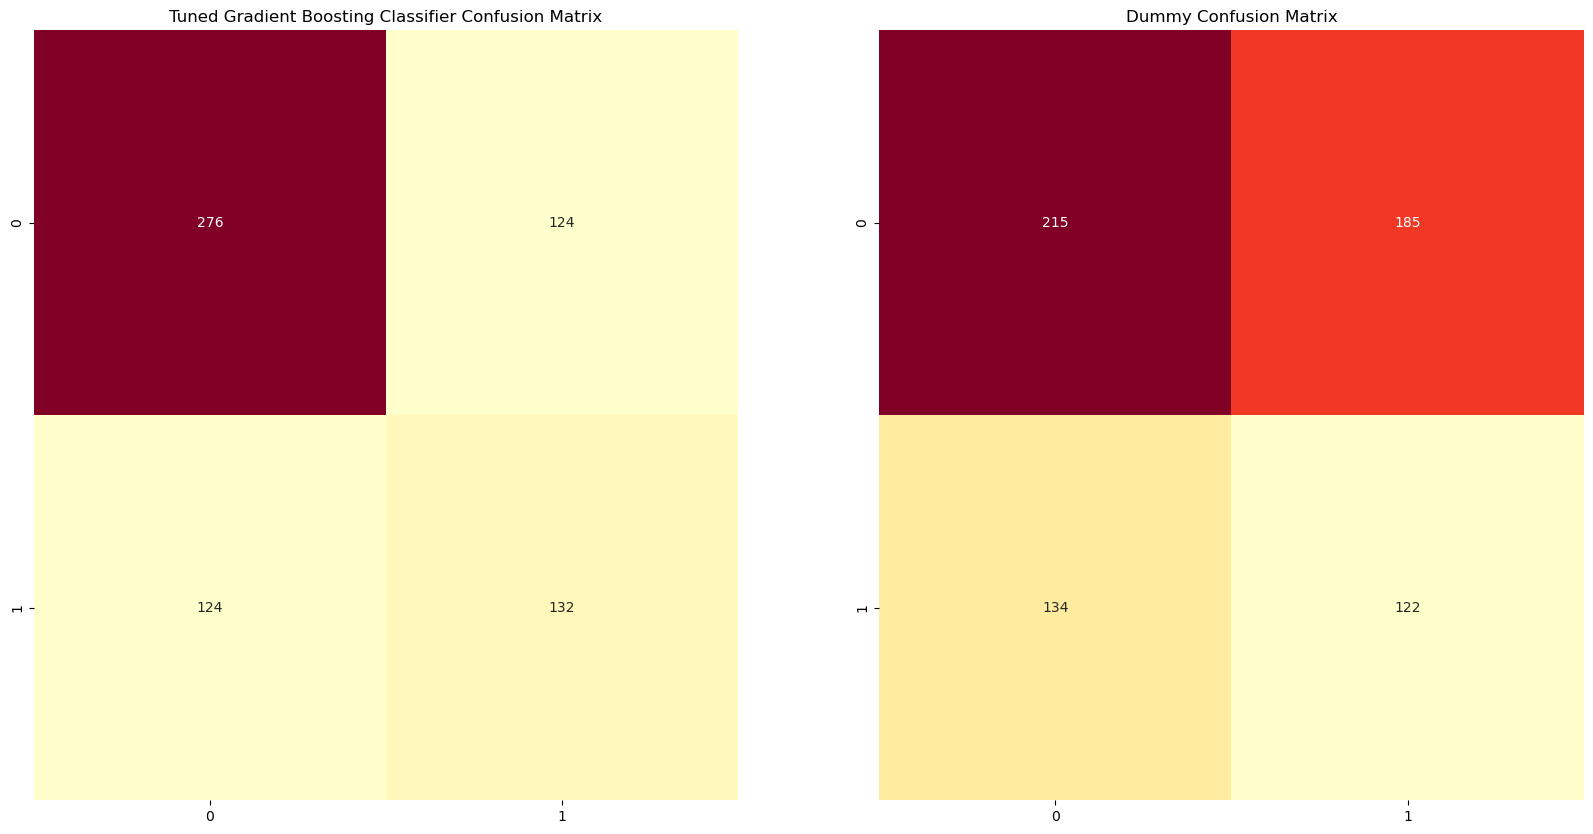

<Figure size 1000x1000 with 0 Axes>

In [74]:
# Create figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)
dummy_cm = confusion_matrix(y_test, dummy_y_pred)

# Generate heatmaps of the confusion matrices
plt.figure(figsize=(10, 10))
sns.heatmap(rf_cm, annot=True, fmt="", cbar=False, cmap="YlOrRd", ax=ax1)
sns.heatmap(dummy_cm, annot=True, fmt="", cbar=False, cmap="YlOrRd", ax=ax2)

# Set titles
ax1.set_title("Tuned Gradient Boosting Classifier Confusion Matrix")
ax2.set_title("Dummy Confusion Matrix")
plt.show()

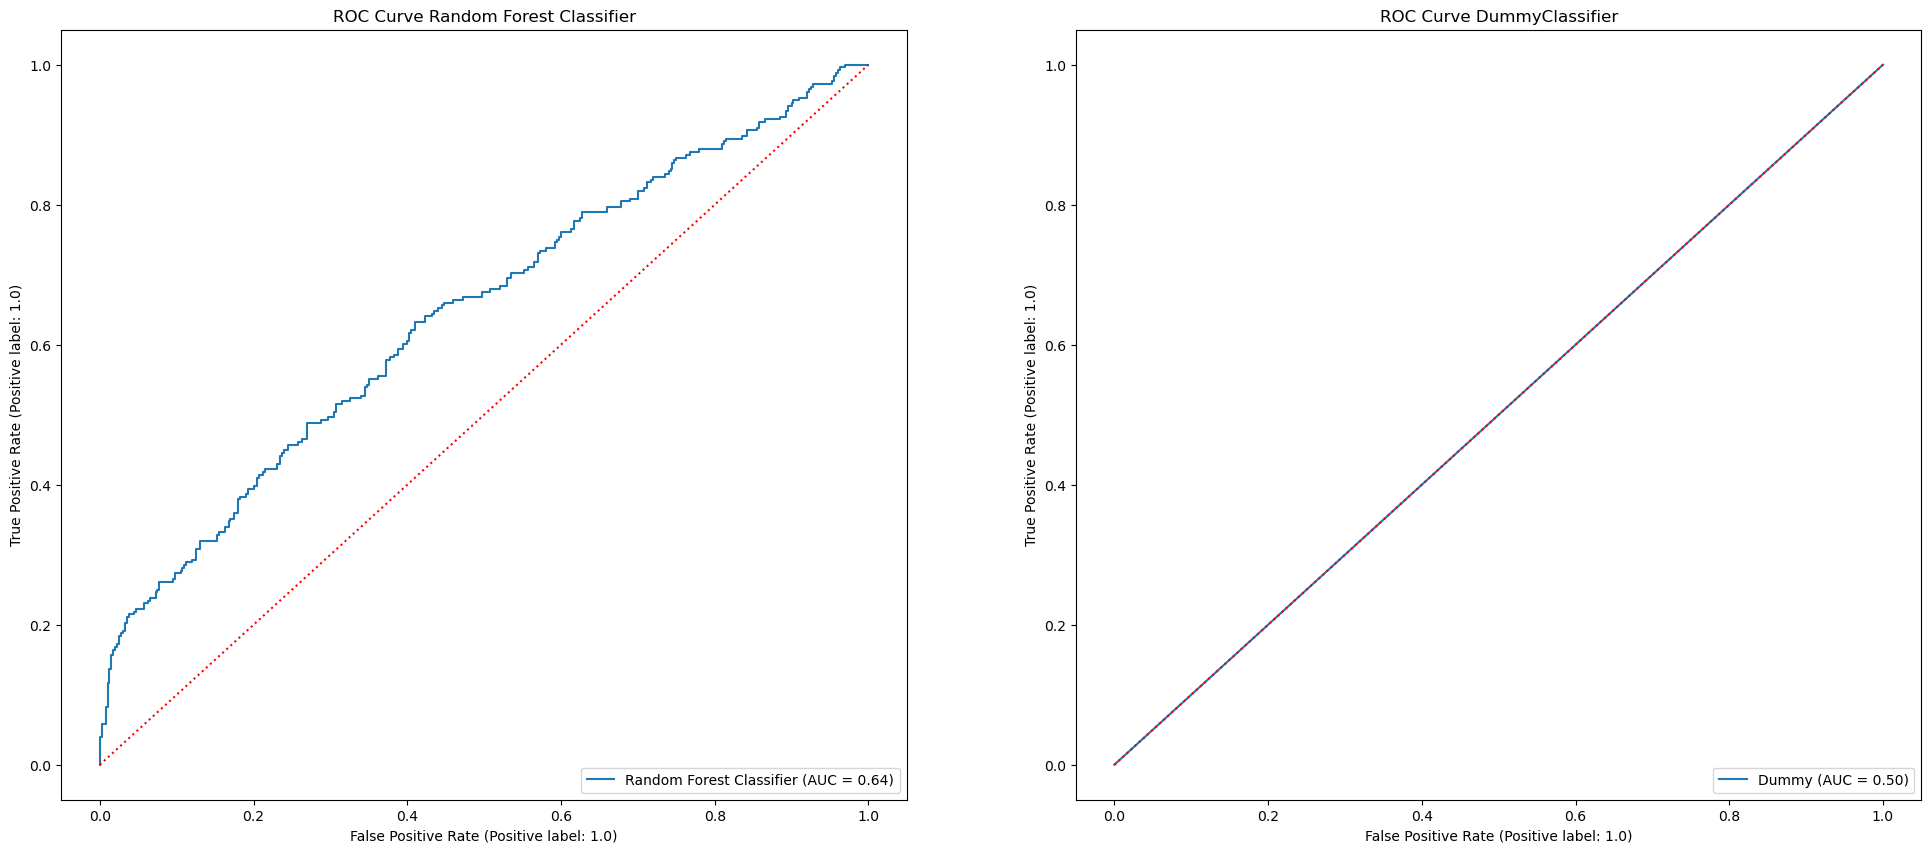

In [75]:
# Create figure
fig, ax = plt.subplots(1, 2, figsize=(24, 10))

# Gradient Boosting Classifier
RocCurveDisplay.from_estimator(rf_search, X_test, y_test, ax=ax[0], name="Random Forest Classifier")

# Dummy Classifier
RocCurveDisplay.from_estimator(dummy, X_test, y_test, ax=ax[1], name="Dummy")

# 50% line
x = np.linspace(0, 1, 2)
ax[0].plot(x, x, ":", color="red")
ax[1].plot(x, x, ":", color="red")

# Set titles
ax[0].set_title("ROC Curve Random Forest Classifier")
ax[1].set_title("ROC Curve DummyClassifier")
plt.show()

In [76]:
# Classification Report
print(
    f"""
Random Forest Classifier:
{classification_report(y_test, rf_y_pred, digits=3)}

Dummy Classifier:
{classification_report(y_test, dummy_y_pred, digits=3)}
"""
)


Random Forest Classifier:
              precision    recall  f1-score   support

         0.0      0.690     0.690     0.690       400
         1.0      0.516     0.516     0.516       256

    accuracy                          0.622       656
   macro avg      0.603     0.603     0.603       656
weighted avg      0.622     0.622     0.622       656


Dummy Classifier:
              precision    recall  f1-score   support

         0.0      0.616     0.537     0.574       400
         1.0      0.397     0.477     0.433       256

    accuracy                          0.514       656
   macro avg      0.507     0.507     0.504       656
weighted avg      0.531     0.514     0.519       656




In [77]:
# Calculate the feature importances
print(rf_clf[-1].feature_importances_)
importance = pd.Series(rf_clf[-1].feature_importances_,index=X_training.columns).sort_values(ascending=False)

# Create plot
fig, ax = plt.subplots(figsize=(12, 9))

sns.barplot(
    x=importance[importance > 0].values, 
    y=importance[importance > 0].index,  
    ax=ax,
    color="royalblue" 
)

# Format the plot
ax.set_title("Feature Importance of Tuned Random Forest Classifier")
for i in ax.containers:
    ax.bar_label(i, fmt = '%.4f%%')

# Show plot
plt.show()


[0.14998278 0.11506226 0.11084867 0.1268816  0.14947956 0.08502083
 0.08876326 0.0760363  0.09792474]


ValueError: Length of values (9) does not match length of index (10)